In [1]:
print("Hello")

Hello


In [3]:
!torchrun --nproc_per_node=8 --nnodes=1 \
    --master_addr="localhost" --master_port="12345" \
    rc_6_transformer.py

W0506 00:04:26.976522 1422798 site-packages/torch/distributed/run.py:793] 
W0506 00:04:26.976522 1422798 site-packages/torch/distributed/run.py:793] *****************************************
W0506 00:04:26.976522 1422798 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0506 00:04:26.976522 1422798 site-packages/torch/distributed/run.py:793] *****************************************
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/versions/1
Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/versions/1
Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/ver

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("syedjaferk/indias-weather-data")

print("Path to dataset files:", path)

/SASTRA-NEW-CLUSTER/users/baari/miniconda3/envs/research_credits/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/versions/1
Path to dataset files: /SASTRA-NEW-CLUSTER/users/baari/.cache/kagglehub/datasets/syedjaferk/indias-weather-data/versions/1


In [3]:
!nvidia-smi

Sat May  3 22:43:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H200                    On  |   00000000:1B:00.0 Off |                    0 |
| N/A   28C    P0             74W /  700W |       1MiB / 143771MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [4]:
!ls $path


weather_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(path + "/weather_data.csv")
df.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


**Taking only Tamil Nadu into account**


In [4]:
#TN = df[df['state'] == 'Tamil Nadu']
TN = df
TN.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


In [5]:
TN.shape

(5634122, 20)

## Time Stuff


In [6]:
TN['dt_txt'] = pd.to_datetime(TN['dt_txt'])
# TN = TN.set_index('dt_txt').sort_index()

In [7]:
TN.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra


In [8]:
TN['time_diff'] = TN.index.to_series().diff()

In [9]:
unique_intervals = TN['time_diff'].unique()
unique_intervals

array([nan,  1.])

# NOVEL


In [10]:
# CUTTING FROM DATAFRAME - SELECTING 100,000
#TN = TN.sample(n=1000000).sort_index()

In [11]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [12]:
# Resample to daily frequency (paper uses monthly)
# Only include numeric features for the mean calculation

# df = TN.select_dtypes(include=np.number).resample('3H').mean().ffill()
# dates = df.index

# Lets keep the spatial data too
df = TN

In [13]:
df.shape

(5634122, 21)

In [14]:
df.columns

Index(['id', 'city_name', 'city_id', 'latitude', 'longitude', 'dt_txt', 'temp',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'main', 'description', 'clouds', 'wind_speed',
       'wind_degree', 'region', 'state', 'time_diff'],
      dtype='object')

In [15]:
df.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,...,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state,time_diff
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,...,971,59,Clouds,scattered clouds,44,2.83,312,West\n,Maharashtra,NaN
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,...,971,42,Clouds,few clouds,22,1.95,297,West\n,Maharashtra,1.0
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,...,967,34,Clear,clear sky,0,2.93,234,West\n,Maharashtra,1.0
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,...,966,32,Clear,clear sky,0,1.15,246,West\n,Maharashtra,1.0
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,...,968,41,Clear,clear sky,0,1.68,65,West\n,Maharashtra,1.0


In [16]:
def prepare_spatial_data(df, seq_length=12, target_cols=['temp', 'humidity', 'pressure', 'wind_speed', 'clouds'], feature_cols=None):
    """Process weather data to include spatial information"""
    if feature_cols is None:
        feature_cols = ['temp', 'temp_min', 'temp_max', 'pressure', 'sea_level',
                       'grnd_level', 'humidity', 'clouds', 'wind_speed', 'wind_degree']

    # Convert datetime to consistent format if needed
    if df['dt_txt'].dtype == 'object':
        df['dt_txt'] = pd.to_datetime(df['dt_txt'])

    # Sort by location and time
    df = df.sort_values(['city_id', 'dt_txt'])

    # Group by location
    city_groups = df.groupby('city_id')

    X_list, y_list, coords_list = [], [], []

    # Normalize features for better training
    feature_scaler = MinMaxScaler()  # same as paper
    target_scaler = MinMaxScaler()

    # Fit scalers on all data to ensure consistency
    feature_scaler.fit(df[feature_cols])
    target_scaler.fit(df[target_cols])

    for city_id, group in city_groups:
        # Extract location coordinates
        lat = group['latitude'].iloc[0]
        lon = group['longitude'].iloc[0]

        # Get features and normalize
        features = group[feature_cols].values
        targets = group[target_cols].values

        features = feature_scaler.transform(features)
        targets = target_scaler.transform(targets)

        # Create sequences for time series prediction
        for i in range(len(features) - seq_length):
            X_list.append(features[i:i + seq_length])
            y_list.append(targets[i + seq_length])
            coords_list.append(np.array([lat, lon]))

    return np.array(X_list), np.array(y_list), np.array(coords_list), feature_scaler, target_scaler

In [ ]:
X, y, coords, feature_scaler, target_scaler = prepare_spatial_data(df)

In [18]:
X.shape, y.shape, coords.shape

((5629766, 12, 10), (5629766, 5), (5629766, 2))

In [19]:
# 2. Split data into train/val/test
from sklearn.model_selection import train_test_split

# First split out test set
X_train_val, X_test, y_train_val, y_test, coords_train_val, coords_test = train_test_split(
    X, y, coords, test_size=0.15, random_state=42
)

# Then split training data into train and validation
X_train, X_val, y_train, y_val, coords_train, coords_val = train_test_split(
    X_train_val, y_train_val, coords_train_val, test_size=0.15, random_state=42
)

In [20]:
from torch.utils.data import DataLoader, TensorDataset

In [21]:
# 3. Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(
    torch.FloatTensor(X_train),
    torch.FloatTensor(y_train).unsqueeze(1),
    torch.FloatTensor(coords_train)
)

val_dataset = TensorDataset(
    torch.FloatTensor(X_val),
    torch.FloatTensor(y_val).unsqueeze(1),
    torch.FloatTensor(coords_val)
)

test_dataset = TensorDataset(
    torch.FloatTensor(X_test),
    torch.FloatTensor(y_test).unsqueeze(1),
    torch.FloatTensor(coords_test)
)

In [22]:
train_loader = DataLoader(train_dataset, batch_size=2048, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2048)
test_loader = DataLoader(test_dataset, batch_size=2048)

---


In [23]:
import torch
import torch.nn as nn
import math
import torch.distributed as dist
from torch.utils.data import DataLoader
from torch.utils.data.distributed import DistributedSampler

In [24]:
import torch
import torch.nn as nn
import math
import torch.distributed as dist
from torch.utils.data import DataLoader
from torch.utils.data.distributed import DistributedSampler

class PositionalEncoding(nn.Module):
    """Positional encoding for the transformer model"""
    def __init__(self, d_model, max_seq_length=100):
        super().__init__()
        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)

        self.register_buffer('pe', pe)

    def forward(self, x):
        # x shape: [batch_size, seq_length, d_model]
        x = x + self.pe[:, :x.size(1), :]
        return x

class ProbSparseAttention(nn.Module):
    """Probability Sparse Attention mechanism from Informer"""
    def __init__(self, d_model, n_heads, factor=5, dropout=0.1):
        super().__init__()
        self.factor = factor
        self.dropout = nn.Dropout(dropout)
        self.n_heads = n_heads  # Add this line
        self.d_model = d_model  # Add this line

        # Assuming you have these projections in your original code
        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)
        self.out_proj = nn.Linear(d_model, d_model)

    def _prob_QK(self, Q, K, sample_k):
        B, H, L_Q, D = Q.shape
        _, _, L_K, _ = K.shape

        # Calculate sample_k for keys
        sample_k = min(int(self.factor * math.log(L_K)), L_K)

        # Calculate Q_K_sample for sampled queries
        K_expand = K.unsqueeze(-3).expand(B, H, L_Q, L_K, D)
        K_sample = K_expand[:, :, torch.randint(L_K, (sample_k,)), :, :]
        Q_K_sample = torch.matmul(Q.unsqueeze(-2), K_sample.transpose(-2, -1)).squeeze(-2)

        # Calculate Q_K here, outside the if block
        Q_K = torch.matmul(Q, K.transpose(-2, -1))

        # Calculate M with correct dimension handling
        M = Q_K_sample.max(-1)[0] - torch.div(Q_K_sample.sum(-1), L_K)

        # Calculate topk with safe bounds
        topk_val = min(int(self.factor * math.log(L_Q)), L_Q)  # Critical fix
        M_top = M.topk(topk_val, sorted=False)[1]

        return Q_K, M_top



    def forward(self, queries, keys, values):
        B, L, _ = queries.shape
        _, S, _ = keys.shape
        H = self.n_heads
        D = self.d_model // H

        queries = self.q_proj(queries).view(B, L, H, D).transpose(1, 2)
        keys = self.k_proj(keys).view(B, S, H, D).transpose(1, 2)
        values = self.v_proj(values).view(B, S, H, D).transpose(1, 2)

        # ProbSparse Attention
        sample_k = min(int(self.factor * math.log(S)), S)
        Q_K, M_top = self._prob_QK(queries, keys, sample_k)

        # Scale
        Q_K = Q_K / math.sqrt(D)

        # Attention
        attn = torch.softmax(Q_K, dim=-1)
        attn = self.dropout(attn)

        # Get output
        output = torch.matmul(attn, values[torch.arange(B)[:, None, None],
                                          torch.arange(H)[None, :, None],
                                          M_top, :])
        output = output.transpose(1, 2).contiguous().view(B, L, self.d_model)
        output = self.out_proj(output)

        return output

class EncoderLayer(nn.Module):
    """Transformer encoder layer with ProbSparse attention"""
    def __init__(self, d_model, n_heads, d_ff=2048, dropout=0.1):
        super().__init__()
        self.attention = ProbSparseAttention(d_model, n_heads, dropout=dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_ff, d_model),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        # Self-attention with residual connection
        attn_output = self.attention(x, x, x)
        x = self.norm1(x + attn_output)

        # Feed-forward with residual connection
        ff_output = self.ff(x)
        x = self.norm2(x + ff_output)

        return x

class WeatherTransformer(nn.Module):
    """Transformer model for weather prediction with spatial awareness"""
    def __init__(self, input_size, num_features, output_size, spatial_features=2,
                 d_model=128, n_heads=8, n_layers=3, d_ff=256, dropout=0.1):
        super().__init__()

        # Spatial embedding branch - similar to original model
        self.spatial_embedding = nn.Sequential(
            nn.Linear(spatial_features, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, d_model)
        )

        # Input embedding for temporal features
        self.input_embedding = nn.Linear(input_size, d_model)

        # Positional encoding
        self.pos_encoding = PositionalEncoding(d_model)

        # Transformer encoder layers
        self.encoder_layers = nn.ModuleList([
            EncoderLayer(d_model, n_heads, d_ff, dropout)
            for _ in range(n_layers)
        ])

        # Fusion layer to combine spatial and temporal features
        self.fusion = nn.Sequential(
            nn.Linear(d_model * 2, d_model),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # Output layers
        self.fc = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_model // 2, output_size)
        )

    def forward(self, x, coords):
        # Process spatial coordinates
        spatial_features = self.spatial_embedding(coords)  # [batch, d_model]

        # Process temporal data with transformer
        x = self.input_embedding(x)  # [batch, seq, d_model]
        x = self.pos_encoding(x)

        # Apply transformer encoder layers
        for layer in self.encoder_layers:
            x = layer(x)

        # Get sequence representation (last time step)
        temporal_features = x[:, -1, :]  # [batch, d_model]

        # Fuse spatial and temporal features
        combined = torch.cat([temporal_features, spatial_features], dim=1)
        fused = self.fusion(combined)

        # Final prediction
        return self.fc(fused)


In [ ]:
def train_transformer_model(model, train_loader, val_loader, epochs=50, lr=0.002):
    """Train a transformer-based weather prediction model"""
    local_rank = dist.get_rank()
    device = torch.device(f'cuda:{local_rank}')

    # Initialize optimizer with learning rate warmup
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Learning rate scheduler with warmup
    def lr_lambda(current_step):
        warmup_steps = 1000
        if current_step < warmup_steps:
            return float(current_step) / float(max(1, warmup_steps))
        return 1.0

    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    # Loss function
    criterion = nn.MSELoss()

    # Training tracking
    best_val_loss = float('inf')
    patience, patience_counter = 15, 0
    train_losses, val_losses = [], []
    global_step = 0

    for epoch in range(epochs):
        # Set epoch for distributed sampler
        if isinstance(train_loader.sampler, DistributedSampler):
            train_loader.sampler.set_epoch(epoch)

        # Training phase
        model.train()
        train_loss = 0

        for X_batch, y_batch, coords_batch in train_loader:
            X_batch = X_batch.float().to(device)
            y_batch = y_batch.float().to(device)
            coords_batch = coords_batch.float().to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(X_batch, coords_batch)
            loss = criterion(outputs, y_batch.squeeze(1))  # Remove extra dimension

            # Backward pass and optimize
            loss.backward()

            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            scheduler.step()

            # Accumulate and average loss across processes
            dist.all_reduce(loss, op=dist.ReduceOp.SUM)
            train_loss += loss.item() / dist.get_world_size()
            global_step += 1

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase (only on rank 0)
        if local_rank == 0:
            model.eval()
            val_loss = 0

            with torch.no_grad():
                for X_val, y_val, coords_val in val_loader:
                    X_val = X_val.float().to(device)
                    y_val = y_val.float().to(device)
                    coords_val = coords_val.float().to(device)

                    outputs = model(X_val, coords_val)
                    loss = criterion(outputs, y_val.squeeze(1))  # Remove extra dimension
                    val_loss += loss.item()

            avg_val_loss = val_loss / len(val_loader)
            val_losses.append(avg_val_loss)

            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.8f}, Val Loss: {avg_val_loss:.8f}")

            # Early stopping and model saving (only on rank 0)
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                patience_counter = 0
                torch.save(model.state_dict(), 'best_weather_transformer.pt')
                print(f"New best model saved with validation loss: {best_val_loss:.8f}")
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

    # Load best model
    if local_rank == 0:
        print(f"Training complete. Best validation loss: {best_val_loss:.8f}")
        model.load_state_dict(torch.load('best_weather_transformer.pt'))

    return model, train_losses, val_losses


In [ ]:
# import torch.distributed as dist
# dist.destroy_process_group()

In [25]:
# DISTRIBUTED
import os
import torch.distributed as dist

# Set environment variables for distributed training
os.environ["MASTER_ADDR"] = "localhost"  # Or your master node's IP address
os.environ["MASTER_PORT"] = "12345"  # Choose an available port
#os.environ["RANK"] = str(0)  # Rank of the current process
os.environ["WORLD_SIZE"] = str(8)  # Total number of processes

dist.init_process_group(backend='nccl')  # 'nccl' for GPUs
local_rank = dist.get_rank()
torch.cuda.set_device(local_rank)

ValueError: Error initializing torch.distributed using env:// rendezvous: environment variable RANK expected, but not set

In [26]:
# Initialize the transformer model
target_cols = ['temp', 'humidity', 'pressure', 'wind_speed', 'clouds']
input_size = X.shape[2]  # Number of features

# Create the transformer model
transformer_model = WeatherTransformer(
    input_size=input_size,
    num_features=input_size,
    output_size=len(target_cols),  # Number of target variables
    spatial_features=2,
    d_model=256, # Increase from 128
    n_heads=8,
    n_layers=6,  # Increase from 3
    d_ff=512, # Increase from 256
    dropout=0.1
)


# Move model to GPU before wrapping with DDP
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transformer_model.to(device)

WeatherTransformer(
  (spatial_embedding): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=256, bias=True)
  )
  (input_embedding): Linear(in_features=10, out_features=256, bias=True)
  (pos_encoding): PositionalEncoding()
  (encoder_layers): ModuleList(
    (0-5): 6 x EncoderLayer(
      (attention): ProbSparseAttention(
        (dropout): Dropout(p=0.1, inplace=False)
        (q_proj): Linear(in_features=256, out_features=256, bias=True)
        (k_proj): Linear(in_features=256, out_features=256, bias=True)
        (v_proj): Linear(in_features=256, out_features=256, bias=True)
        (out_proj): Linear(in_features=256, out_features=256, bias=True)
      )
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0)

In [ ]:


# Wrap the model for distributed training
transformer_model = nn.parallel.DistributedDataParallel(
    transformer_model, device_ids=[local_rank]
)

# Create data loaders with distributed sampler
train_sampler = DistributedSampler(train_dataset)
train_loader = DataLoader(
    train_dataset,
    batch_size=2048, ### changed from 32
    sampler=train_sampler,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=2048,
    shuffle=False,
    pin_memory=True
)

# Train the transformer model
trained_transformer, train_losses, val_losses = train_transformer_model(
    transformer_model,
    train_loader,
    val_loader,
    epochs=100,
    lr=0.002
)

KeyboardInterrupt: 

In [29]:
def inference_transformer(model, test_loader, device):
    """Run inference with the trained transformer model"""
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for X_test, y_test, coords_test in test_loader:
            X_test = X_test.float().to(device)
            y_test = y_test.float().to(device)
            coords_test = coords_test.float().to(device)

            # Forward pass
            outputs = model(X_test, coords_test)

            # Store predictions and actuals (Modified part)
            predictions.append(outputs.cpu().numpy().squeeze())  # Remove extra dimension
            actuals.append(y_test.cpu().numpy().squeeze())  # Remove extra dimension

    # Concatenate batches
    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)

    return predictions, actuals

# Create test loader
test_loader = DataLoader(
    test_dataset,
    batch_size=2048,
    shuffle=False
)




---


## Inference

In [ ]:
# load the best model
# Train the transformer model
# trained_transformer, train_losses, val_losses = train_transformer_model(
#     transformer_model,
#     train_loader,
#     val_loader,
#     epochs=100,
#     lr=0.002
# )
# Define trained transformer model
trained_transformer = WeatherTransformer(
    input_size=input_size,
    num_features=input_size,
    output_size=len(target_cols),  # Number of target variables
    spatial_features=2,
    d_model=256, # Increase from 128
    n_heads=8,
    n_layers=6,  # Increase from 3
    d_ff=512, # Increase from 256
    dropout=0.1
)
# Load the best model from directory for inference
# Handle DDP/DataParallel 'module.' prefix in state_dict
state_dict = torch.load('FINAL_best_weather_transformer.pt')
if any(k.startswith('module.') for k in state_dict.keys()):
    new_state_dict = {k.replace('module.', ''): v for k, v in state_dict.items()}
    trained_transformer.load_state_dict(new_state_dict)
else:
    trained_transformer.load_state_dict(state_dict)
trained_transformer.eval()

In [37]:
# Run inference
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trained_transformer.to(device)
preds, actuals = inference_transformer(trained_transformer, test_loader, device)

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for each target variable
for i, col in enumerate(target_cols):
    mse = mean_squared_error(actuals[:, i], preds[:, i])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals[:, i], preds[:, i])
    r2 = r2_score(actuals[:, i], preds[:, i])

    print(f"Metrics for {col}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")

Metrics for temp:
  RMSE: 0.0150
  MAE: 0.0102
  R²: 0.9840
Metrics for humidity:
  RMSE: 0.0394
  MAE: 0.0264
  R²: 0.9750
Metrics for pressure:
  RMSE: 0.0091
  MAE: 0.0068
  R²: 0.9851
Metrics for wind_speed:
  RMSE: 0.0255
  MAE: 0.0179
  R²: 0.7990
Metrics for clouds:
  RMSE: 0.1151
  MAE: 0.0680
  R²: 0.8704


In [ ]:
# ...existing code...
        # Create scatter plot with error intensity
        scatter = m.scatter(
            x, y, c=current_errors, s=50, cmap='coolwarm',
            alpha=0.7, edgecolors='k',
            vmin=0, vmax=10  # <-- Set your desired color scale limits here
        )
# ...existing code...

In [ ]:
#!pip install basemap

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

def visualize_spatial_predictions(model, test_loader, target_cols, target_scaler=None):
    """Create a map visualization of prediction accuracy across India
    for multiple target variables"""

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    all_preds, all_targets, all_coords = [], [], []

    with torch.no_grad():
        for X_test, y_test, coords_test in test_loader:
            X_test = X_test.float().to(device)
            coords_test = coords_test.float().to(device)

            outputs = model(X_test, coords_test)

            all_preds.extend(outputs.cpu().numpy())
            all_targets.extend(y_test.numpy())
            all_coords.extend(coords_test.cpu().numpy())

    # Convert to arrays
    predictions = np.array(all_preds)
    targets = np.array(all_targets)
    coords = np.array(all_coords)

    # Reshape before inverse transform
    predictions = predictions.reshape(-1, predictions.shape[-1])
    targets = targets.reshape(-1, targets.shape[-1])

    # Inverse transform if applicable
    if target_scaler:
        predictions = target_scaler.inverse_transform(predictions)
        targets = target_scaler.inverse_transform(targets)

    # Calculate errors for each target variable
    errors = np.abs(predictions - targets)

    # Create subplots for each target variable
    num_targets = len(target_cols)
    fig, axes = plt.subplots(num_targets, 1, figsize=(12, 10 * num_targets))

    for i, target_col in enumerate(target_cols):
        ax = axes[i] if num_targets > 1 else axes  # Handle single target case
        m = Basemap(projection='merc',
                    llcrnrlat=6, urcrnrlat=38,
                    llcrnrlon=68, urcrnrlon=98,
                    resolution='i', ax=ax)

        m.drawcoastlines()
        m.drawcountries()
        m.drawstates()

        # Convert lat/lon to map coordinates
        x, y = m(coords[:, 1], coords[:, 0])  # lon, lat

        # Select errors corresponding to the current target and coordinates
        current_errors = errors[:, i]  # Select errors for the current target variable (i)

        # Create scatter plot with error intensity
        scatter = m.scatter(
            x, y, c=current_errors, s=50, cmap='coolwarm',
            alpha=0.7, edgecolors='k',
            vmin=0, vmax=10
        )

        plt.colorbar(scatter, label=f'Prediction Error ({target_col})', ax=ax)
        ax.set_title(f'Spatial Distribution of Prediction Errors ({target_col})')

    plt.tight_layout()
    plt.show()

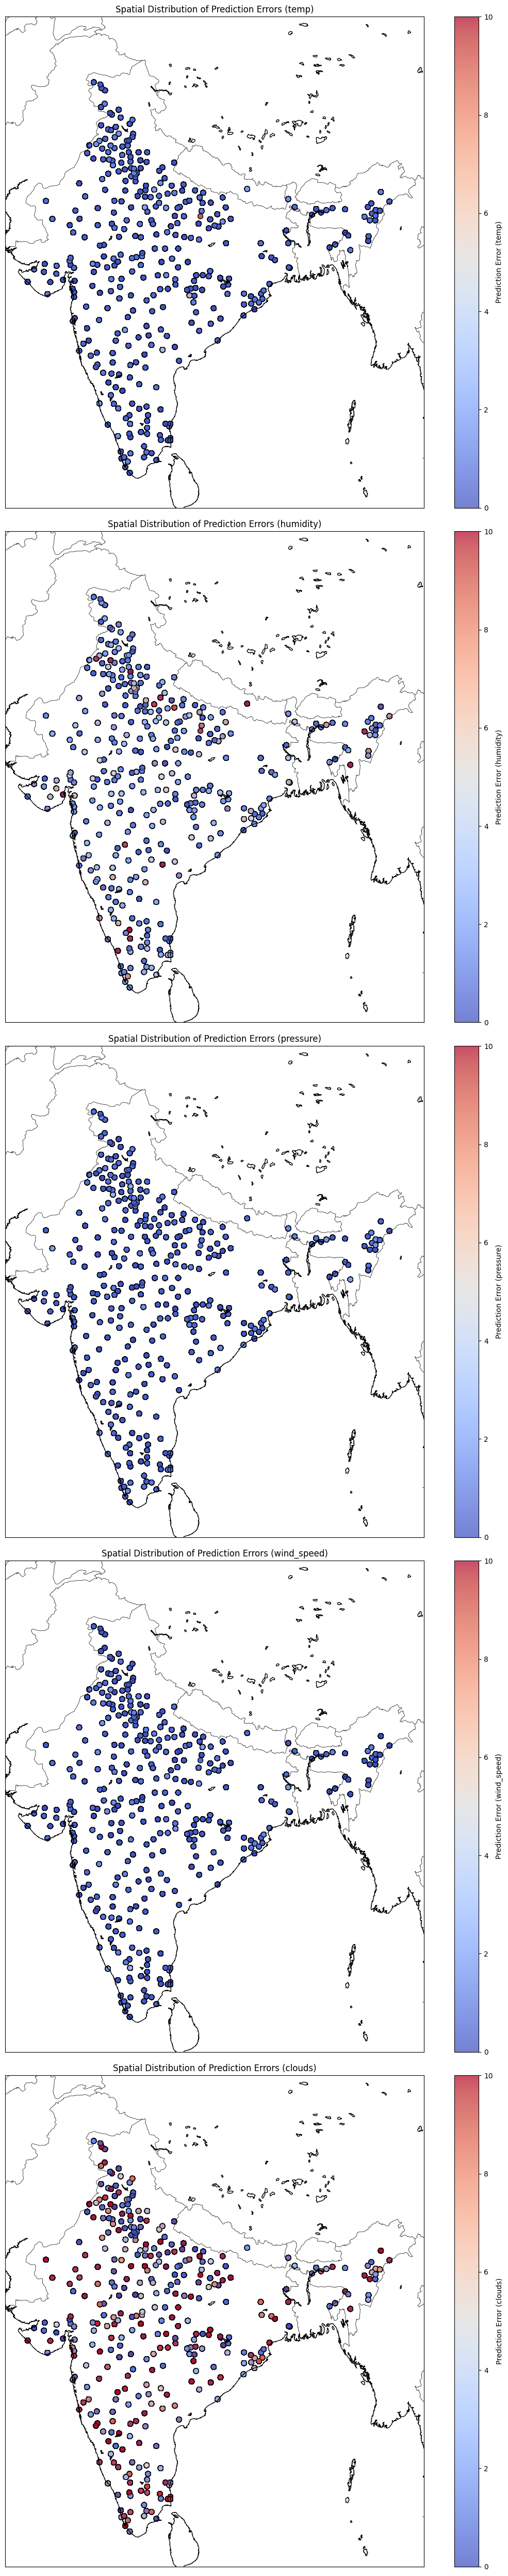

<Figure size 640x480 with 0 Axes>

In [39]:
visualize_spatial_predictions(
    trained_transformer, test_loader, target_cols=['temp', 'humidity', 'pressure', 'wind_speed', 'clouds'], target_scaler=target_scaler
)

# save image
plt.savefig('transformer_spatial_predictions.png')

In [ ]:
# RUn 1 row into the model and visualize the CNN
import torch
import torch.nn as nn   
import torch.nn.functional as F
import matplotlib.pyplot as plt

